# **AI-Driven Public Transport Image Classification for Road Safety and Efficiency**

**BUSINESS UNDERSTANDING**

**Introduction : The State of Kenya’s Public Transport**

Kenya’s public transport system is essential for millions of daily commuters, with Matatus, Buses, TukTuks, and BodaBodas forming the backbone of urban and rural mobility. Despite its importance, the sector is plagued by road safety concerns, traffic congestion, and a lack of regulatory enforcement. Reckless driving, overloaded vehicles, and poor maintenance contribute to high accident rates, while unoptimized PSV routes exacerbate urban congestion, particularly in Nairobi CBD.

**The Need for an AI-Based Solution**

Current transport challenges demand an intelligent and automated approach to classify, track, and regulate PSVs in real time. Manual enforcement methods are inefficient, making it difficult for authorities to ensure compliance with road safety regulations.By leveraging AI-powered classification and object detection models, the transport sector can move towards a more structured and efficient system, ensuring safer roads, reduced congestion, and optimized route planning.

**What is Beba Beba AI?**

Beba Beba AI is an AI-powered transport monitoring system designed to enhance road safety, traffic efficiency, and regulatory compliance by leveraging deep learning image classification and object detection techniques.

The system will classify PSVs into Matatus, Buses, TukTuks, and BodaBodas, detect unsafe or overloaded vehicles, and provide real-time PSV tracking to optimize urban mobility. By addressing challenges such as reckless driving, congestion, and optimizing PSV route planning, Beba Beba AI will support traffic authorities,and transport operators with actionable insights.

**Key Stakeholders in Beba Beba AI**

Government Institutions → Ministry of Roads & Transport, NTSA, KENHA (for traffic regulation & transport planning) and county governments.

International Organizations → Entities like IRU and other organizations focused on transportation systems.

Matatu Saccos & Ride-Hailing Services → Companies like Uber, Bolt, and Matatu Saccos benefit from improved fleet operations.

Vehicle Manufacturers → Companies like Toyota, Nissan, and Tata gain valuable market insights for PSV safety & performance.

Research Institutions & Universities → Academic organizations conducting AI and computer vision research.

AI Startups → Innovators working on intelligent transport & road safety solutions.

## **Project Objectives – Beba Beba AI**

**Primary Objective**

***Enhancing Road Safety with Automated PSV Classification***

Develop and deploy an AI-powered classification system to identify and categorize Public Service Vehicles (PSVs), including matatus, buses, boda-bodas, and tuk-tuks. The system will assist law enforcement and regulatory agencies in detecting non-compliant vehicles (e.g., overloaded, unroadworthy, excessively modified), helping to reduce road accidents and improve transport safety.

*Modeling Strategy:*

Deep Learning Approach → Use Convolutional Neural Networks (CNNs) to classify PSVs and detect non-compliance features such as damaged vehicles, missing regulatory markings, and illegal modifications.
Object Detection → Use YOLOv8 or Faster R-CNN to identify overloaded or unsafe PSVs from images or video feeds.

**Secondary Objective**

***Real-Time Traffic Monitoring & Route Optimization***

Implement a real-time PSV tracking system to monitor vehicle movements, providing actionable insights for traffic flow optimization and congestion reduction. This system will aid in urban planning and transport regulation by analyzing PSV density and movement patterns, particularly in high-traffic areas like Nairobi CBD.

*Modeling Strategy:*

Object Detection for Real-Time Tracking → Deploy YOLOv8, Faster R-CNN, or SSD on street cameras to detect and track PSV movements.
PSV Count Tracker → Monitor how many PSVs operate in key areas within a set time frame, allowing transport authorities to make data-driven decisions.

***Improving Fleet Management & Operational Efficiency***

Automate PSV classification and tracking to support transport operators, fleet managers, and insurance providers in monitoring vehicle conditions, optimizing maintenance schedules, and ensuring compliance with regulations. This system will help reduce operational costs and improve efficiency in the transport sector.

*Modeling Strategy:*

Deep Learning for Fleet Monitoring → Use CNN-based classification models to analyze PSV images and detect wear, damage, or anomalies that could indicate maintenance issues.
Anomaly Detection → Identify irregular patterns in vehicle usage, enabling predictive maintenance and reducing downtime.

**Data Processing and Infrastructure**

The project will utilize Google Colab for cloud-based training, OpenCV for video processing, and TensorFlow/Keras for deep learning implementation. The image dataset will undergo extensive preprocessing, ensuring high-quality data for model training.

**Model Performance Metrics**

*Classification Accuracy* (≥ 85%) → Measures the correctness of PSV type predictions.

*F1-Score* (≥ 80%) → Balances precision and recall to evaluate classification reliability.

*Mean Average Precision* (mAP ≥ 80%) → Measures object detection accuracy for real-time monitoring.

*False Positive & False Negative Rate* → Ensures misclassification is minimized.





**Future Integration and Impact**

Beyond its initial implementation, Beba Beba AI can be expanded to integrate with government agencies for policy enforcement. The model can also be adapted to process live traffic camera feeds, providing real-time insights for city planners, PSV saccos and law enforcement. Ultimately, Beba Beba AI aims to make Kenyan roads safer, improve transport efficiency, and modernize PSV regulation through AI-driven solutions.

## **1. DATA UNDERSTANDING**



**Dataset Overview**

Public Service Vehicle Categories: Matatus, Buses (e.g Minibuses, electric buses, huge buses), Boda-Bodas, Tuk-Tuks

Additionally under Buses we also gathered images of various PSV Saccos e.g Super Metro, KBS, City Hopper etc.


**Data Sources:**

Google Images → Collected using web scraping tools (e.g., Fatkun Extension).
Public Datasets → Sources like Google Open Images and OpenStreetMap.
Alternative Data Collection: If direct access to sources is not feasible, manual data collection and labeling was done.



**1.1 Import necessary libraries and load images data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from sklearn.model_selection import train_test_split
# Augment the Training Data:
import albumentations as A
#from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from PIL import Image
import numpy as np

In [3]:
#Mounting Google Drive to access data stored in the folders within the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define the dataset directory (same as Jupyter Notebook directory)
dataset_path = "/content/drive/MyDrive/Capstone_Project_Group1/images_cleaned_batch_3"


# Check if the dataset is accessible
print("Dataset contents:", os.listdir(dataset_path))

Dataset contents: ['buses', 'tuktuk', 'bodaboda', 'matatu']


**1.2 Review of uploaded image dataset**

As shown above we have now loaded the data.
Below we will now look at the following:
1. Total number of images per category in the data
2. Preliminary image validity check
3. Renaming images with a consistent naming structure as images had various names indicative of source of extraction.
4. Converting the data set to a data frame for easy viewing of the images for each category
5. Checking the count and distribution of images



***Total number of images per category in the data***


In [5]:
# Define paths for each category
tuktuk_path = os.path.join(dataset_path, "tuktuk")
matatu_path = os.path.join(dataset_path, "matatu")
bus_path = os.path.join(dataset_path, "buses")
boda_path = os.path.join(dataset_path, "bodaboda")

# Verify files in each category
print("TukTuk Images:", len(os.listdir(tuktuk_path)))
print("Matatu Images:", len(os.listdir(matatu_path)))
print("Bus Images:", len(os.listdir(bus_path)))
print("BodaBoda Images:", len(os.listdir(boda_path)))

TukTuk Images: 199
Matatu Images: 197
Bus Images: 195
BodaBoda Images: 195


**Preliminary image validity check**

 - Checking if the images are in the approriate formart and identify any corrupted images

In [6]:
# Function to check for corrupted images in the Images Data folder (specifically files not in the correct format)



def check_image_validity(dataset_path, valid_extensions=('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
    """Checks for valid image files in a directory and its subdirectories.

    Args:
        dataset_path: The path to the root directory of your image dataset in Google Drive.
        valid_extensions: A tuple of valid image file extensions (case-insensitive).

    Returns:
        A dictionary where keys are category names (folder names) and values are lists of invalid image file paths within that category.  Also prints summary information.
    """

    invalid_images = {}
    total_images = 0
    corrupted_count = 0

    for root, _, files in os.walk(dataset_path):  # Walk through subdirectories
        category = os.path.basename(root)  # Get the category name (folder name)
        invalid_images[category] = []  # Initialize list for this category

        for filename in files:
            if filename.lower().endswith(valid_extensions): # Case-insensitive check
                filepath = os.path.join(root, filename)
                total_images += 1
                try:
                    img = Image.open(filepath)  # Or img = cv2.imread(filepath) for OpenCV
                    img.verify()  # Verify image integrity
                    img.close()
                except (IOError, SyntaxError) as e:  # Catch potential errors
                    print(f"Invalid image: {filepath} - {e}")
                    invalid_images[category].append(filepath)
                    corrupted_count += 1
            elif not filename.lower().endswith(valid_extensions):
                filepath = os.path.join(root, filename)
                print(f"Invalid file extension: {filepath}")
                invalid_images[category].append(filepath)


    print("\n--- Summary ---")
    print(f"Total images checked: {total_images}")
    print(f"Corrupted images found: {corrupted_count}")

    for category, invalid_files in invalid_images.items():
        if invalid_files:
            print(f"\nInvalid files in category '{category}':")
            for file in invalid_files:
                print(f"  - {file}")
        else:
            print(f"\nNo invalid files found in category '{category}'")

    return invalid_images


In [7]:
# Check for invalid data types in our Image Dataset
#dataset_path = '/content/drive/MyDrive/CAPSTONE Project/images_cleaned_batch_3'  # Replace with the actual path to your dataset
invalid_images = check_image_validity(dataset_path)


--- Summary ---
Total images checked: 786
Corrupted images found: 0

No invalid files found in category 'images_cleaned_batch_3'

No invalid files found in category 'buses'

No invalid files found in category 'tuktuk'

No invalid files found in category 'bodaboda'

No invalid files found in category 'matatu'


**Adopting consistent naming structure for images**

- This allows us to name each image in each category so as to easily identify which category each image falls under

In [8]:
# Define dataset categories
categories =['matatu', 'buses', 'tuktuk', 'bodaboda']

# Loop through each category folder and rename images
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png','.gif', '.bmp'))])

    for index, filename in enumerate(image_files):
        new_name = f"{category.lower()}_{index+1:03d}.jpg"  # e.g., tuktuk_001.jpg
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)
        print(f"Renamed {filename} → {new_name}")

print("✅ Renaming complete for all categories!")

Renamed matatu_001.jpg → matatu_001.jpg
Renamed matatu_002.jpg → matatu_002.jpg
Renamed matatu_003.jpg → matatu_003.jpg
Renamed matatu_004.jpg → matatu_004.jpg
Renamed matatu_005.jpg → matatu_005.jpg
Renamed matatu_006.jpg → matatu_006.jpg
Renamed matatu_007.jpg → matatu_007.jpg
Renamed matatu_008.jpg → matatu_008.jpg
Renamed matatu_009.jpg → matatu_009.jpg
Renamed matatu_010.jpg → matatu_010.jpg
Renamed matatu_011.jpg → matatu_011.jpg
Renamed matatu_012.jpg → matatu_012.jpg
Renamed matatu_013.jpg → matatu_013.jpg
Renamed matatu_014.jpg → matatu_014.jpg
Renamed matatu_015.jpg → matatu_015.jpg
Renamed matatu_016.jpg → matatu_016.jpg
Renamed matatu_017.jpg → matatu_017.jpg
Renamed matatu_018.jpg → matatu_018.jpg
Renamed matatu_019.jpg → matatu_019.jpg
Renamed matatu_020.jpg → matatu_020.jpg
Renamed matatu_021.jpg → matatu_021.jpg
Renamed matatu_022.jpg → matatu_022.jpg
Renamed matatu_023.jpg → matatu_023.jpg
Renamed matatu_024.jpg → matatu_024.jpg
Renamed matatu_025.jpg → matatu_025.jpg


**Creating a data frame for easy image viewing**

 - In the next code we first aligned the image formart and resized the images
 - Next we created a data frame of the data to enable easy viewing of the images and the categories they fall under
 - Resizing criteria used was 224 by 224 as this is the recommended sizing according to best practice when it comes to applying CNN models

✅ Dataset loaded successfully!
                                               Image Category
0  [[[226, 234, 245], [226, 234, 245], [230, 239,...    buses
1  [[[20, 33, 13], [18, 31, 12], [26, 41, 22], [3...    buses
2  [[[183, 195, 209], [181, 193, 207], [179, 191,...    buses
3  [[[73, 68, 39], [95, 90, 61], [69, 64, 35], [7...    buses
4  [[[57, 63, 61], [78, 81, 78], [100, 102, 99], ...    buses


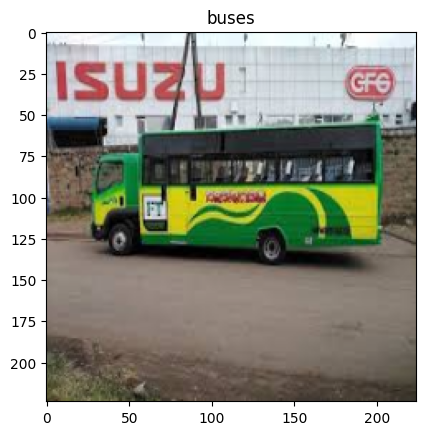

In [9]:


# Define categories
categories = os.listdir(dataset_path)

# Store image data
data = []
labels = []

# Load images from each category folder
for category in categories:
    folder_path = os.path.join(dataset_path, category)

    if os.path.isdir(folder_path):  # Check if it's a folder
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            try:
                # Load image using OpenCV (BGR format)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

                # Resize image to (224x224) for consistency
                img = cv2.resize(img, (224, 224))

                # Append to lists
                data.append(img)
                labels.append(category)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Create a DataFrame for easy exploration
df = pd.DataFrame({"Image": list(data), "Category": labels})

print("✅ Dataset loaded successfully!")
print(df.head())  # Show first few rows

# Display an example image
plt.imshow(data[0])  # Show first image
plt.title(labels[0])  # Show category
plt.show()


**Expanding the view of our data to check randomly the first 5 images for each category**

In [10]:


def display_images(df, num_images=5):
    categories = df["Category"].unique()  # Get unique categories from the DataFrame
    num_categories = len(categories)

    fig, axes = plt.subplots(num_categories, num_images, figsize=(15, 3 * num_categories))  # Adjust figure size dynamically

    for i, category in enumerate(categories):
        category_df = df[df["Category"] == category]

        if category_df.empty:  # Check if DataFrame is empty for this category
            print(f"No images found for category: {category}")
            continue  # Skip to the next category

        n_images_to_display = min(num_images, len(category_df)) # Ensure that it does not attempt to display more images than available for the category.
        category_images = category_df.sample(n_images_to_display)["Image"].values

        for j, img in enumerate(category_images):
            try:  # Handle potential issues with image display
                if num_categories == 1: # If only one category, axes is not an array, so we need to handle it differently
                    axes[j].imshow(img)
                    axes[j].axis("off")
                    if j == 0:
                        axes[j].set_title(category, fontsize=12)
                else: # If more than 1 category
                    axes[i, j].imshow(img)
                    axes[i, j].axis("off")
                    if j == 0:
                        axes[i, j].set_title(category, fontsize=12)
            except Exception as e:
                print(f"Error displaying image for {category}: {e}")

    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with 'Category' and 'Image' columns):
display_images(df)

Output hidden; open in https://colab.research.google.com to view.

**Checking image count and distribution per category**

In [11]:
df["Category"].value_counts()

,count
Category,
tuktuk,199
matatu,197
buses,195
bodaboda,195


<ipython-input-12-74d98f8fa79c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(


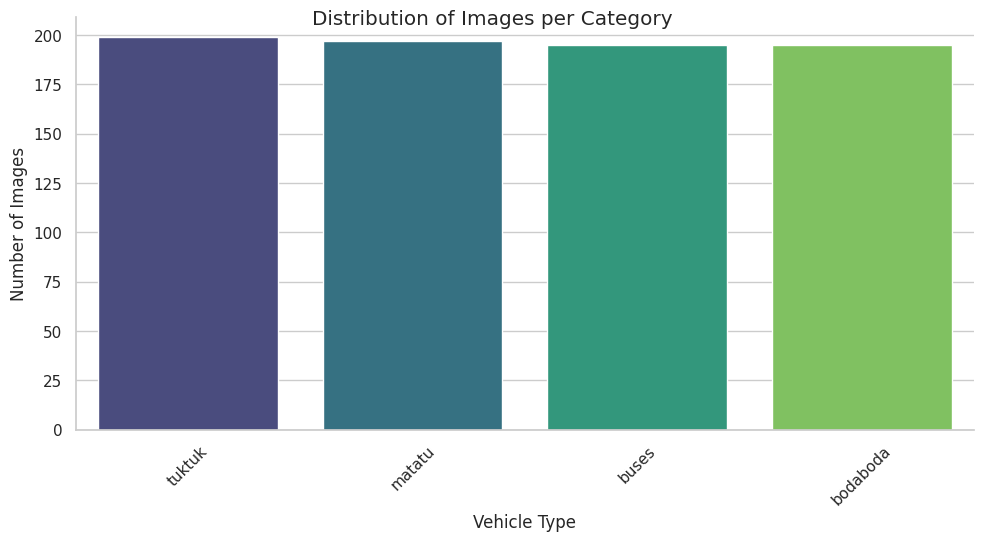

In [12]:
# Count images per category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Vehicle Type', 'Number of Images']

# Plot distribution using Seaborn
sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data=category_counts,
    kind="bar",
    x="Vehicle Type",
    y="Number of Images",
    palette="viridis",
    height=5,
    aspect=2
)
ax.set_axis_labels("Vehicle Type", "Number of Images")
ax.fig.suptitle("Distribution of Images per Category")

# Rotate x-axis labels
ax.set_xticklabels(rotation=45)

# Show the plot
sns.despine()
plt.show();